# Section 1: Background and Motivation

The following project sets out to find optimal wealth redistribution methods using agent based models. These models are incredibly useful for visualizing and updating an economic model, especially one as intense as this. First let me better define what I mean by optimal wealth redistribution. In any economy there is some variation of wealth across each person, which are our agents in the model. Capitalists are typically wealthier than the average person and have the ability to decide wages, while non-capitalists take the set wage and buy some amount of goods. We use this system to find an equilibria tax rate that will allow our economy to become more fair over time. This theoretic approach allows us to work with policy that is logistically complex with ease and gives us the ability to quickly model outcomes with various input changes.
   
We see many news headlines regarding the growing wealth inequality around the world and more specifically in America. The model sets out to use a closed capitalist economy, this means there is no flow of money in/out to/from foreign governments and massivly simplifies our model, to show the change in wealth (not income) in our economy. Using this model we're able to find tax rates across different groups in an effort to create a more fair and well distributed economy. As an economics major pursuing a graduate degree studying game theory and labor economics this project gave me an opportunity to work on questions that I've been interested in for a long time, and the class provided the tools I would need to answer this.

Finally I'd like to explicitly state my questions:

1. What is, if it should exist, an optimal tax rate to redistribute wealth in an equitable way?
2. Does this rate change over time and converge to a single value for both capitalists and non-capitalists?
3. How will wealth be redistributed in our system, will it be cyclical, or absolutley convergent?

# Section 2: Methodology

Notice, I've broken up the code into it's various subsections. 
1. Creating our boards
2. Defining our games rules
3. Defining our tax and redistribution functions
4. Plotting
5. Results

In [27]:
# standard includes
import numpy as np
import numpy.random as rand
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Create our Boards

In the following 2 cells we create a board which will be referred to as the cap_board, and the wealth_board. The cap_board initializes a grid of your chosen board size (defaulting to 10 by 10) and randomly plots 'capitalists' on this board. This board is used throughout the game to help define rules that capitalists follow and rules that non-capitalists follow. The wealth_board is used as a sort of data tracking board. It is never used for strictly defining rules, but is referenced during our tax and redistribution functions, as well as is the primary board for plotting our models.

In [28]:
# Make our Rule Board
def make_cap(board_size=10,density=0.1):
    """
    This function creates a board of capitalists(1) and non-capitalists(0) over a defined board space and density.
    The board space is defined as a square grid with lengths board_size and defaults to 10 and density 0.1, which
    I believe to be a decent density of the project.
    """
    # give our seed
    np.random.seed(1234567890)
    # our game_board stores a grid of zeroes in with side lengths board_size and board_size
    game_board = np.zeros((board_size,board_size),dtype='int64')
    
    # loop over the entire board
    for i in range(board_size):
        for j in range(board_size):
            # chooses a random number from a normal distribution
            # if this number is less than our density, plot a capitalist
            if rand.random() <= density:
                game_board[i,j] = 1
    # create a copy of the game_board to save our cap_board
    cap_board = game_board.copy()
    return cap_board

In [29]:
# Set the starting wealth for our economy
def start_wealth(cap_board, c_wealth = 100000, p_wealth = 60000):
    """
    This function takes in our cap_board and sets the initial wealth values of our capitalists and others.
    The wealth values given can be changed but default to 100,000 and 60,000 for capitalists and non-capitalists
    respectively.
    """
    # create a copy of the cap_board to use in the function and later return
    wealth_board = cap_board.copy()
    # loop over the entire board
    for i in range(len(cap_board)):
        for j in range(len(cap_board)):
            # checks if the board at each position is a capitalist
            if cap_board[i,j] == 1:
                # if they are a capitalist set their initial wealth to the defined value
                wealth_board[i,j] = c_wealth
            else:
                # if they are not a capitalist set their initial wealth to the defined value
                wealth_board[i,j] = p_wealth

    return wealth_board

# Define Rules

The rules below are used to run our simulated economy. They include the consumption of goods based on a decided radius from capitalists and a wage based in the same system. I've set the radii to be equal as people spend their money closely to the place they're employed. One system that I was unable to work around is for those living near multiple capitalists. Unfortunately I was unable to code a work around given the timeline of the project, so for anybody found within the radius of more than one capitalist they will be working two jobs.

There is also a third function called UBI. This function will be used later to demonstrate the concept of a universal basic income. A UBI program has been tried in many scandanavian countries with varying levels of success and is a handy tool for us to use. During our simulation you'll see the UBI come into play as a way to subsidize non-capitalists, a tool which is needed quite a bit.

In [30]:
def consume_goods(wealth_board, cap_board, buy = 1000):
    """
    This funciton takes in a wealth_board for manipulation, and a cap_board for finding our different agents
    and doing something to the wealth_board. It loops over all the possible spots on the board and finds our
    capitalists and then has the non-capitalists around them buy goods from them.
    """
    # loop over the entire board
    for i in range(0, len(cap_board)):
        for j in range(0, len(cap_board)):
            # find our capitalists
            if cap_board[i,j] == 1:
                # r defines the radius around the capitalist we check
                for r in range(1,3):
                    # all if statements are to decide if the blocks being used are on the board
                    # check left 1
                    if i > r:
                        wealth_board[i,j] += buy
                        wealth_board[i-r,j] -= buy
                    # check right 1
                    if i < wealth_board.shape[1]-r:
                        wealth_board[i,j] += buy
                        wealth_board[i+r,j] -= buy
                    # check down 1
                    if j > r:
                        wealth_board[i,j] += buy
                        wealth_board[i,j-r] -= buy
                    # check up 1
                    if j < wealth_board.shape[1]-r:
                        wealth_board[i,j] += buy
                        wealth_board[i,j+r] -= buy
                    # check up left 1
                    if i > r and j < wealth_board.shape[1]-r:
                        wealth_board[i,j] += buy
                        wealth_board[i-r,j+r] -= buy
                    # check up right 1
                    if i < wealth_board.shape[1]-r and j < wealth_board.shape[1]-r:
                        wealth_board[i,j] += buy
                        wealth_board[i+r,j+r] -= buy
                    # check down left 1
                    if j > r and i > r and cap_board[i-r,j-r] == 0:
                        wealth_board[i,j] += buy
                        wealth_board[i-r,j-r] -= buy
                    # check down right 1
                    if j > r and i < wealth_board.shape[1]-r:
                        wealth_board[i,j] += buy
                        wealth_board[i+r,j-r] -= buy
    return wealth_board

In [31]:
def pay_wages(wealth_board, cap_board, wage = 1000):
    """
    This funciton takes in a wealth_board for manipulation, and a cap_board for finding our different agents
    and doing something to the wealth_board. It loops over all the possible spots on the board and finds our
    capitalists and then has the non-capitalists around them buy goods from them.
    """
    # loop over the entire board
    for i in range(0, len(cap_board)):
        for j in range(0, len(cap_board)):
            # find our capitalists
            if cap_board[i,j] == 1:
                for r in range(1,3):
                    # all if statements are to decide if the blocks being used are on the board
                    # check left 1
                    if i > r:
                        wealth_board[i,j] -= wage
                        wealth_board[i-r,j] += wage
                    # check right 1
                    if i < wealth_board.shape[1]-r:
                        wealth_board[i,j] -= wage
                        wealth_board[i+r,j] += wage
                    # check down 1
                    if j > r:
                        wealth_board[i,j] -= wage
                        wealth_board[i,j-r] += wage
                    # check up 1
                    if j < wealth_board.shape[1]-r:
                        wealth_board[i,j] -= wage
                        wealth_board[i,j+r] += wage
                    # check up left 1
                    if i > r and j < wealth_board.shape[1]-r:
                        wealth_board[i,j] -= wage
                        wealth_board[i-r,j+r] += wage
                    # check up right 1
                    if i < wealth_board.shape[1]-r and j < wealth_board.shape[1]-r:
                        wealth_board[i,j] -= wage
                        wealth_board[i+r,j+r] += wage
                    # check down left 1
                    if j > r and i > r:
                        wealth_board[i,j] -= wage
                        wealth_board[i-r,j-r] += wage
                    # check down right 1
                    if j > r and i < wealth_board.shape[1]-r:
                        wealth_board[i,j] -= wage
                        wealth_board[i+r,j-r] += wage
    return wealth_board

In [32]:
def UBI(wealth_board, cap_board, given = 1000):
    """
    This function loops over the board and looks for non-capitalists then gives them some decided upon
    amount of money, think of it as a government subsidy for the poor.
    """
    # loop over the board
    for i in range(0, len(cap_board)):
        for j in range(0, len(cap_board)):
            # find our non-capitalists
            if cap_board[i,j] == 0:
                # add the desired subsidy amount to the current non-capitalist
                # and update their wealth
                wealth_board[i,j] = wealth_board[i,j] + given
    return wealth_board

# Tax and Redistribution

In [33]:
def opt_tax(wealth_board, cap_board, precision):
    """
    Find the optimal tax to bring about wealth equality, takes in the boards and 
    a user decided acceptable wealth inequality then finds the tax rate that should be placed on the 
    person in question.
    """
    # initialized 100 points between 0 and 1 in 0.01 segments
    tax_range = np.linspace(0,1,100)
    # create lists to store our optimal taxes for each capitalist and person
    tax_list_cap = []
    tax_list_pes = []
    # loop over the entire board
    for i in range(0, len(cap_board)):
        for j in range(0, len(cap_board)):
            # takes each point in our 0-1 tax_range space and checks if it is the optimal tax
            for k in tax_range:
                # all if statements on this indentation check if the [i,j] indexs are on the board
                if i > 1:
                    # checks if the person at board space [i,j] is within the bounds of our
                    # desired precision after applying the tax rate. We use (1-k) because this 
                    # returns the wealth after the tax has been taken then subtract their 
                    # neighbors wealth. If this is close enough then the tax is optimal.
                    if abs(abs(wealth_board[i,j]*(1-k))-abs(wealth_board[i-1,j]))<precision:
                        # this filters the optimal tax rate into our capitalists or persons lists
                        if cap_board[i,j]==1:
                            tax_list_cap.append(k)
                        else:
                            tax_list_pes.append(k)
                # check right 1
                if i < wealth_board.shape[1]-1:
                    if abs(abs(wealth_board[i,j]*(1-k))-abs(wealth_board[i+1,j]))<precision:
                        if cap_board[i,j]==1:
                            tax_list_cap.append(k)
                        else:
                            tax_list_pes.append(k)
                # check down 1
                if j > 1:
                    if abs(abs(wealth_board[i,j]*(1-k))-abs(wealth_board[i,j-1]))<precision:
                        if cap_board[i,j]==1:
                            tax_list_cap.append(k)
                        else:
                            tax_list_pes.append(k)
                # check up 1
                if j < wealth_board.shape[1]-1:
                    if abs(abs(wealth_board[i,j]*(1-k))-abs(wealth_board[i,j+1]))<precision:
                        if cap_board[i,j]==1:
                            tax_list_cap.append(k)
                        else:
                            tax_list_pes.append(k)
                # check up left 1
                if i > 1 and j < wealth_board.shape[1]-1:
                    if abs(abs(wealth_board[i,j]*(1-k))-abs(wealth_board[i-1,j+1]))<precision:
                        if cap_board[i,j]==1:
                            tax_list_cap.append(k)
                        else:
                            tax_list_pes.append(k)
                # check up right 1
                if i < wealth_board.shape[1]-1 and j < wealth_board.shape[1]-1:
                    if abs(abs(wealth_board[i,j]*(1-k))-abs(wealth_board[i+1,j+1]))<precision:
                        if cap_board[i,j]==1:
                            tax_list_cap.append(k)
                        else:
                            tax_list_pes.append(k)
                # check down right 1
                if j > 1 and i < wealth_board.shape[1]-1:
                    if abs(abs(wealth_board[i,j]*(1-k))-abs(wealth_board[i+1,j-1]))<precision:
                        if cap_board[i,j]==1:
                            tax_list_cap.append(k)
                        else:
                            tax_list_pes.append(k)
                # check down left 1
                if i > 1 and j > 1:
                    if abs(abs(wealth_board[i,j]*(1-k))-abs(wealth_board[i-1,j-1]))<precision:
                        if cap_board[i,j]==1:
                            tax_list_cap.append(k)
                        else:
                            tax_list_pes.append(k)
    
    # sum our list
    total_cap = 0
    for t in tax_list_cap:
        total_cap += t
    # find the average optimal tax for capitalists
    # plus one is to ensure we don't divide by zero
    tax_cap = total_cap/(len(tax_list_cap)+1)
    # clears our list for the next loop to be played
    tax_list_cap.clear()
    
    # does the same as above for persons instead of capitalists
    total_pes = 0
    for t in tax_list_pes:
        total_pes += t
    tax_pes = total_pes/(len(tax_list_pes)+1)
    tax_list_pes.clear()
    
    return tax_cap, tax_pes

In [34]:
def redist_wealth(wealth_board, cap_board, tax_caps, tax_peas):
    """
    This function is for redistributing wealth. It loops over the board and takes the sum of our
    taxes collected and gives each person 1/(board_size*board_size). This gives them all an equal share.
    """
    # loop over the board
    for i in range(0, len(cap_board)):
        for j in range(0, len(cap_board)):
            # update wealth for each position to add an equal amount of the total tax collected
            wealth_board[i,j] += np.sum(wealth_board)*(tax_caps+tax_peas)/(len(cap_board)**2)
    
    return wealth_board

In [35]:
def perc_wealth_tax(wealth_board, cap_board, tax_caps, tax_peas):
    """
    This function taxes our capitalists and persons at the desired rate.
    """
    # loop over the board
    for i in range(0, len(cap_board)):
        for j in range(0, len(cap_board)):
            # check if the board position is a capitalist
            if cap_board[i,j] == 1:
                # tax capitalists
                wealth_board[i,j] = wealth_board[i,j]*(1-tax_caps)
            else:
                # tax non-capitalists
                wealth_board[i,j] = wealth_board[i,j]*(1-tax_peas)
    return wealth_board

# Plotting

The following two functions allow us to create our primary plots, a 3D wealth plot that uses our [i,j] coordinate to define the persons location in the city, and their wealth to define how high the bar should be. This gives us a good understanding of how wealth is distributed throughout our economy. The other gives us a plot of our capitalist board so that we can have a top down view and better understand how the 3D plot should look.

In [36]:
def plot3d(board):
    """
    Takes in our wealth_board and returns a 3D plot of their wealth on an [i,j] spatial grid.
    """
    # initializes figure size and axes
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(121, projection='3d')

    x_coord = np.arange(0, len(board[0]), 1)
    y_coord = np.arange(0, len(board[1]), 1)
    # creates a grid of our x and y positions with index at each point
    x_coord_grid, y_coord_grid = np.meshgrid(x_coord, y_coord)
    # creates a list of x and y coords to use for mapping the money board height
    x, y = x_coord_grid.ravel(), y_coord_grid.ravel()
    
    top = board.ravel()
    bottom = np.zeros_like(top)
    width = depth = 0.25
    
    # get desired colormap
    cmap = cm.get_cmap('YlOrRd')
    # get range of colorbars so we can normalize
    max_height = np.max(top)
    min_height = np.min(top)
    # scale each z to [0,1], and get their rgb values
    rgba = [cmap((k-min_height)/max_height) for k in top] 
    
    ax1.bar3d(x, y, bottom, width, depth, top, color=rgba, shade=True)
    ax1.zaxis.set_rotate_label(False)
    ax1.set_xlabel('x-pos')
    ax1.set_ylabel('y-pos')
    ax1.set_zlabel('Wealth', rotation = 0)
    ax1.set_zlim3d(0, max(top)+10000)
    
    plt.show()

In [37]:
# Plot the wealth board
def plotgrid(myarray):
    """
    Takes in our cap_board and plots where they are in relation to each other.
    """
    # Create a 2D array
    x_range = np.linspace(0, myarray.shape[1], myarray.shape[1]) 
    y_range = np.linspace(0, myarray.shape[0], myarray.shape[0])
    
    # Creates your x y grid with column and row length x and y range
    x_indices, y_indices = np.meshgrid(x_range, y_range)
    
    # Defines where captalists are
    capitalist_x = x_indices[myarray == 1];
    capitalist_y = y_indices[myarray == 1];
    
    # Plots capitalists randomly
    plt.plot(capitalist_x, myarray.shape[0] - capitalist_y - 1, 'gs',markersize=10)   
    
    # Lets us see one column and row in all directions extra
    plt.xlim([-1,myarray.shape[1]+1])
    plt.ylim([-1,myarray.shape[0]+1]) 

    # Gets rid of tick marks on the axis
    plt.tick_params(axis='both', which='both',
                    bottom=False, top=False, left=False, right=False,
                    labelbottom=False, labelleft=False)

# Results

The following blocks of code show how our game evolves as we add new functions. We start with a simple model and then use various economic methods to visualize the effect they will have on our closed economy.

The next block of code runs our most simple game. It shows the change over time of an economy with capitalists paying wages and non-capitalists buying things from them. The graph shows us the incredible shifting from moderate wealth inequality to massively skewed systems. It's important to have an appreciation for these graphs as they are the reason why this project is important, they show the natural growth of wealth inequality if nothing is done.

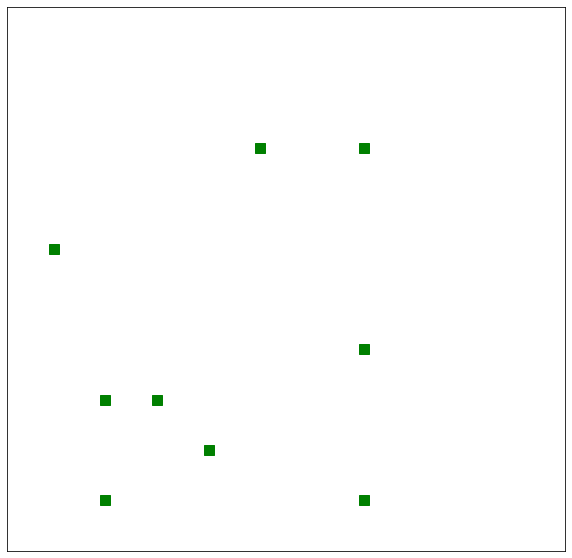

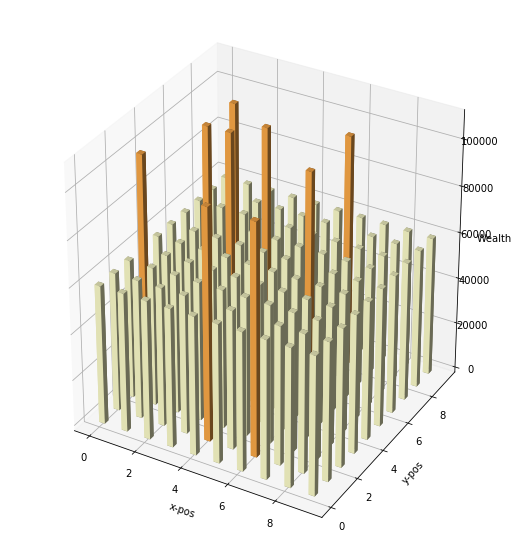

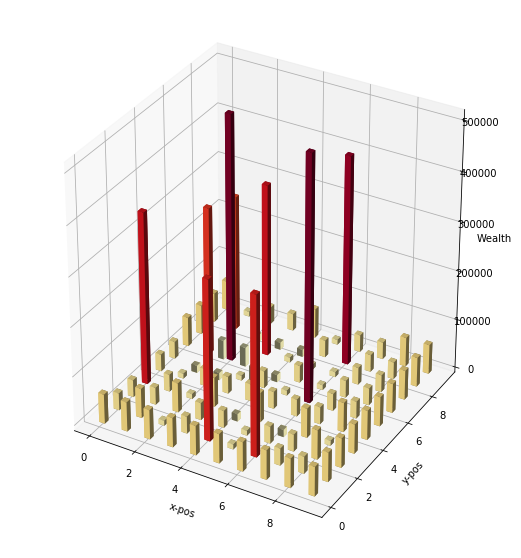

In [38]:
# Initialize Things

# creat our boards
# must create copys so they don't interfere with later plots
cap_board = make_cap()
cap_board = cap_board.copy()
wealth_board = start_wealth(cap_board)
wealth_board = wealth_board.copy()
# game counter
# the game counter lets us use a while loop to start and end our game after a set amount of plays
i = 0
# lists for tax graph
tax_list_cap_1 = []
tax_list_pes_1 = []

# figure size
fig = plt.figure(figsize=(10, 10))

# plots our capitalist board
plotgrid(cap_board)

plot3d(wealth_board)

# play the game i times: set to 50
while i<50:
    
    # find optimal tax in turn i
    tax_cap_1, tax_pes_1 = opt_tax(wealth_board, cap_board, precision=1000)
    
    # append them to seperate lists so we can visualize them later
    tax_list_cap_1.append(tax_cap_1)
    tax_list_pes_1.append(tax_pes_1)
    
    # workeres consume goods
    board = consume_goods(wealth_board, cap_board, buy=2500)
    
    # capitalists pay wages
    board1 = pay_wages(board, cap_board, wage=2000)
    
    # advance the game
    i += 1

# plot our 3D wealthboard
plot3d(board1)

# close the plots so as not to take up too much memory
plt.close()

The next graph shows us our optimal tax rate for capitalists and non-capitalists changing over time. The growth over time isn't surprising, but something interesting to note is the growth of our non-capitalist taxes as well. This happens largely because of spatial misallocation, an economic term that occurs when there is too much business in some areas and not enough in others.

The 3D graph above can show us this phenomena. Notice the capitalists near the middle of our 'city' having higher wealth than those near the edge. This is because they can simply grab more people and so the surrounding area of non-capitalists is also lower because they're paying into more capitalists. This is why cities like Chicago and New York are so expensive and often harbor more poor and homeless than the surrounding suburbs. Seeing this crop up in our model is a good indication that the buying and wage systems work well and are relatively accurate.

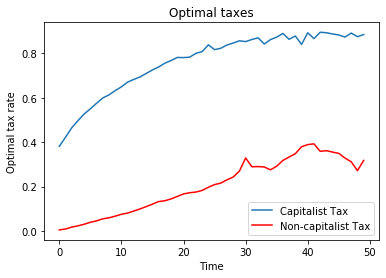

In [39]:
x = range(len(tax_list_cap_1))

y = range(len(tax_list_pes_1))

plt.plot(x, tax_list_cap_1, label='Capitalist Tax')
plt.plot(y, tax_list_pes_1, color='red', label='Non-capitalist Tax')
plt.title('Optimal taxes')
plt.xlabel('Time')
plt.ylabel('Optimal tax rate')
plt.legend(loc=4)

The next system of functions only slightly changes our game. It adds in our universal basic income function, hereby referred to as UBI. This function, as mentioned in its doc-string, gives in our non-capitalists some amount of wealth (500 dollars in this case). The concept of a UBI has been tried in many countries around the world with varying degrees of success. Ultimately the economic theory isn't well supported unless many other areas of the economy are positioned to support a UBI system.

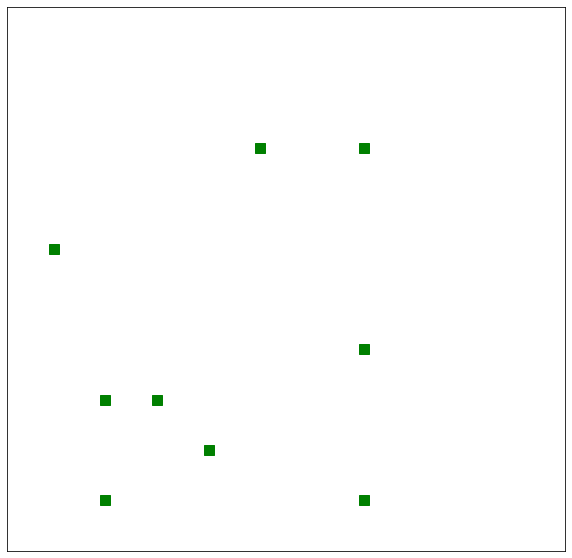

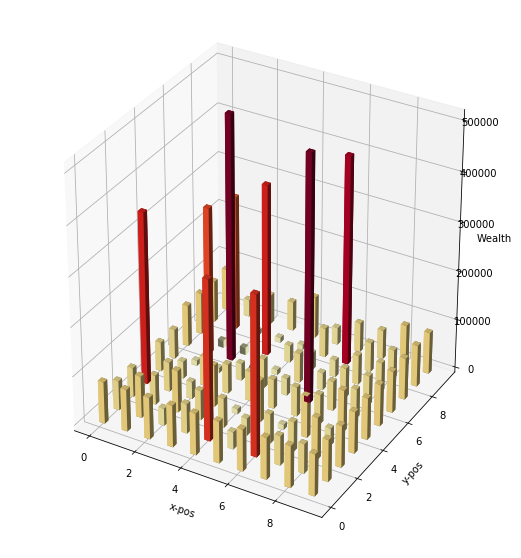

In [40]:
# Initialize Things

cap_board = make_cap()
cap_board = cap_board.copy()
wealth_board = start_wealth(cap_board)
wealth_board = wealth_board.copy()

# game counter
i = 0
# lists for tax graph
tax_list_cap_2 = []
tax_list_pes_2 = []
# figure size
fig = plt.figure(figsize=(10, 10))

# capitalist board
plotgrid(cap_board)

# play the game i times: set to 50
while i<50:
    # find optimal tax in turn i
    tax_cap_2, tax_pes_2 = opt_tax(wealth_board, cap_board, precision=1000)
    tax_list_cap_2.append(tax_cap_2)
    tax_list_pes_2.append(tax_pes_2)
    # workeres consume goods
    board = consume_goods(wealth_board, cap_board, buy=2500)
    # capitalists pay wages
    board1 = pay_wages(board, cap_board, wage=2000)
    # UBI given
    board2 = UBI(board1, cap_board, given=500)
    # advance the game
    i += 1

plot3d(board2)

plt.close()

Now we see a nearly identical system of taxes and 3D wealth plots as without the UBI. As mentioned, without a support system in place of very complex macro-economic instruments the UBI program simply can't help our economy as much as we'd hope. Our first subplot below shows the UBI system in place and our second shows the UBI system overlayed with our original set of equations to demonstrate the difference it created.

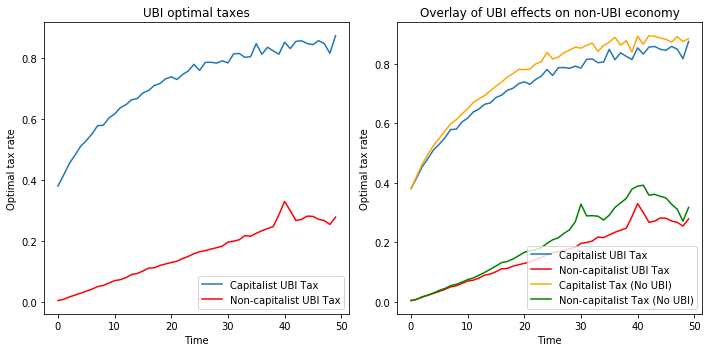

In [41]:
x = range(len(tax_list_cap_2))

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(x, tax_list_cap_2, label='Capitalist UBI Tax')
plt.plot(x, tax_list_pes_2, color='red', label='Non-capitalist UBI Tax')
plt.title('UBI optimal taxes')
plt.xlabel('Time')
plt.ylabel('Optimal tax rate')
plt.legend(loc=4)

plt.subplot(122)
plt.plot(x, tax_list_cap_2, label='Capitalist UBI Tax')
plt.plot(x, tax_list_pes_2, color='red', label='Non-capitalist UBI Tax')
plt.plot(x, tax_list_cap_1, color='orange', label='Capitalist Tax (No UBI)')
plt.plot(x, tax_list_pes_1, color='green', label='Non-capitalist Tax (No UBI)')
plt.title('Overlay of UBI effects on non-UBI economy')
plt.xlabel('Time')
plt.ylabel('Optimal tax rate')
plt.legend(loc=4)

plt.tight_layout()

The next block of code is less of a serious suggestion for economic policy and more-so to demonstrate the effect of taxes on a closed economy. The optimal tax is applied to each person and taken from their wealth but it is never redistributed. The purpose of this code block is to show the tax function works.

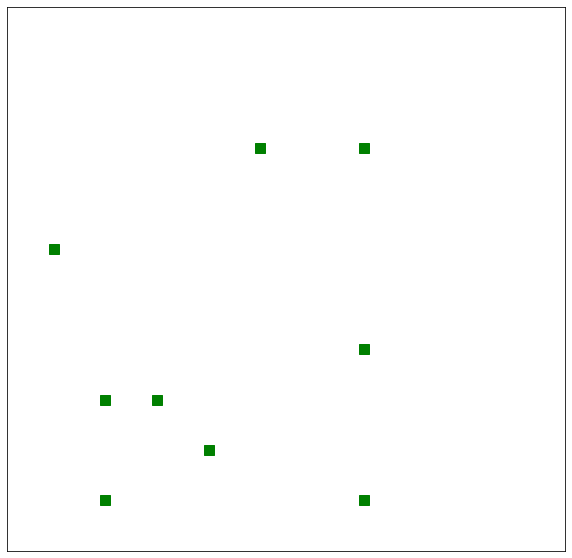

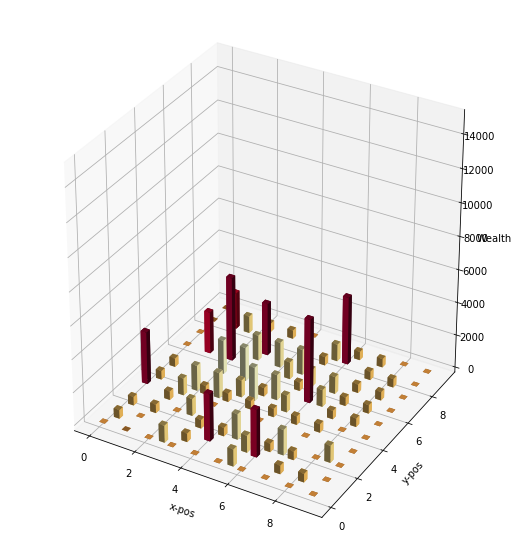

In [42]:
# Initialize Things

# boards
cap_board = make_cap()
cap_board = cap_board.copy()
wealth_board = start_wealth(cap_board)
wealth_board = wealth_board.copy()
# game counter
i = 0
# lists for tax graph
tax_list_cap_3 = []
tax_list_pes_3 = []
# figure size
fig = plt.figure(figsize=(10, 10))

# capitalist board
plotgrid(cap_board)

# play the game i times: set to 50
while i<50:
    # find optimal tax in turn i
    tax_cap_3, tax_pes_3 = opt_tax(wealth_board, cap_board, precision=1000)
    tax_list_cap_3.append(tax_cap_3)
    tax_list_pes_3.append(tax_pes_3)
    # workeres consume goods
    board = consume_goods(wealth_board, cap_board, buy=2500)
    # capitalists pay wages
    board1 = pay_wages(board, cap_board, wage=2000)
    # UBI given
    board2 = UBI(board1, cap_board, given=0)
    # tax all people the optimal tax
    board3 = perc_wealth_tax(board2, cap_board, tax_caps=tax_cap_3, tax_peas=tax_pes_3)
    # advance the game
    i += 1

plot3d(board3)

plt.close()

As we would expect, applying taxes with no redistribution is simply pulling money out of the economy. This of course pulls down all peoples wealth to incredibly low levels. Capitalists fair better than non-capitalists but are still hit very hard. You'll notice the tax graph shows a massive drop in optimal tax rate on capitalists after the first game is played. This is because in the next game their wealth has been taxed 40% and so they now have similar wealth to a regular person in the economy.

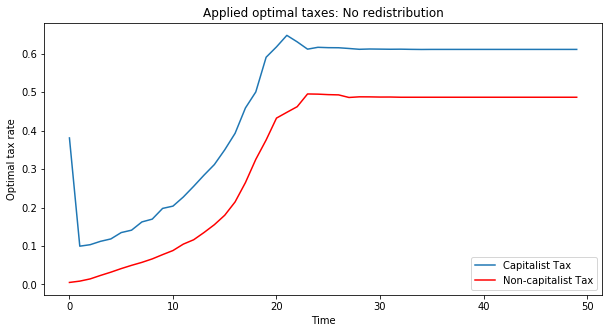

In [43]:
x = range(len(tax_list_cap_3))

plt.figure(figsize=(10,5))

plt.plot(x, tax_list_cap_3, label='Capitalist Tax')
plt.plot(x, tax_list_pes_3, color='red', label='Non-capitalist Tax')
plt.title('Applied optimal taxes: No redistribution')
plt.xlabel('Time')
plt.ylabel('Optimal tax rate')
plt.legend(loc=4)

This board is our penultimate creation. It implements our optimal tax rates and redistribution method to achieve an equilibrium that works for everybody in our economy. This shows a computational proof of concept in regards to an optimal wealth tax. Below you'll see the wealth board is largely equal across all dimensions, what's more interesting is the tax graph.

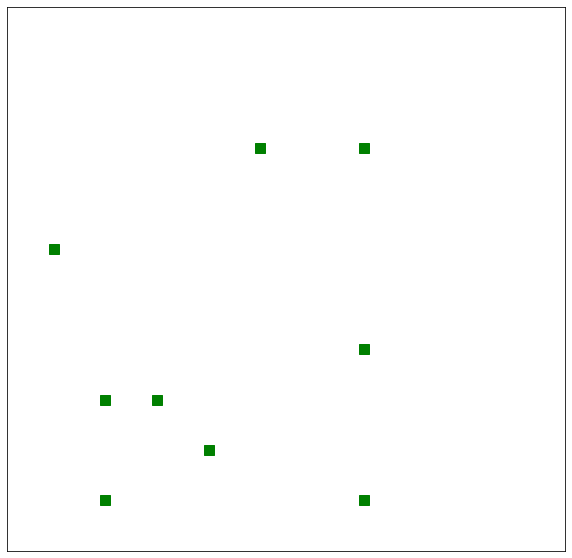

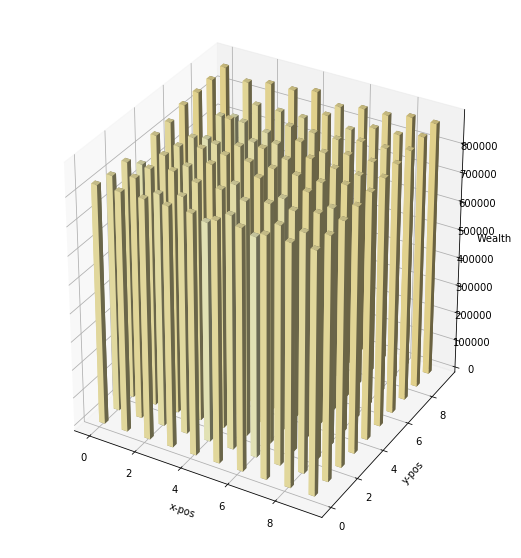

In [44]:
# Initialize Things

# boards
cap_board = make_cap()
cap_board = cap_board.copy()
wealth_board = start_wealth(cap_board)
wealth_board = wealth_board.copy()
# game counter
i = 0
# lists for tax graph
tax_list_cap_4 = []
tax_list_pes_4 = []
# figure size
fig = plt.figure(figsize=(10, 10))

# capitalist board
plotgrid(cap_board)

# play the game i-1 times: set to 50
while i<50:
    # find optimal tax in turn i
    tax_cap_4, tax_pes_4 = opt_tax(wealth_board, cap_board, precision=1000)
    tax_list_cap_4.append(tax_cap_4)
    tax_list_pes_4.append(tax_pes_4)
    # workeres consume goods
    board = consume_goods(wealth_board, cap_board, buy=2500)
    # capitalists pay wages
    board1 = pay_wages(board, cap_board, wage=2000)
    # UBI given
    board2 = UBI(board1, cap_board, given=500)
    # tax all people the optimal tax
    board3 = perc_wealth_tax(board2, cap_board, tax_caps=tax_cap_4, tax_peas=tax_pes_4)
    # redistribute wealth
    board4 = redist_wealth(board3, cap_board, tax_caps=tax_cap_4, tax_peas=tax_pes_4)
    # advance the game
    i += 1

plot3d(board4)

plt.close()

Below we see our optimal tax rate in play with our redistribution effort, as expected there is one massive tax followed by a relatively tight bound between 3 and 7 percent. This gives proof of concept to our optimal tax rate, but of course in practice this is largely useless due to the massive wealth shock in our first game. This would have incredible economic impact and would surely cause more problems than it would solve, so our next objective is to find some way of implementing this tool in a more realistic way. We do this in the following game.

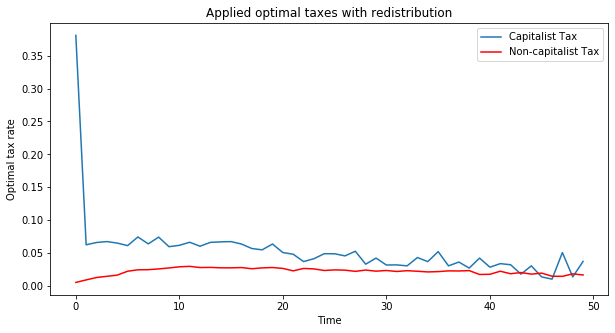

In [45]:
x = range(len(tax_list_cap_4))

plt.figure(figsize=(10,5))

plt.plot(x, tax_list_cap_4, label='Capitalist Tax')
plt.plot(x, tax_list_pes_4, color='red', label='Non-capitalist Tax')
plt.title('Applied optimal taxes with redistribution')
plt.xlabel('Time')
plt.ylabel('Optimal tax rate')
plt.legend(loc=1)

As we noted above, the last hurdle comes from the fix we need to make so that we don't have any shocks to the economy. One way we can work around this is having a fixed percent tax over a long enough time, this helps to bring wealth inequality down more slowly but helps keep everything more stable.

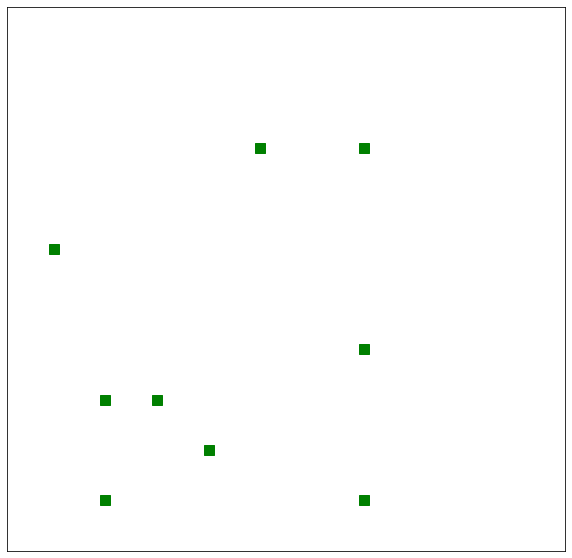

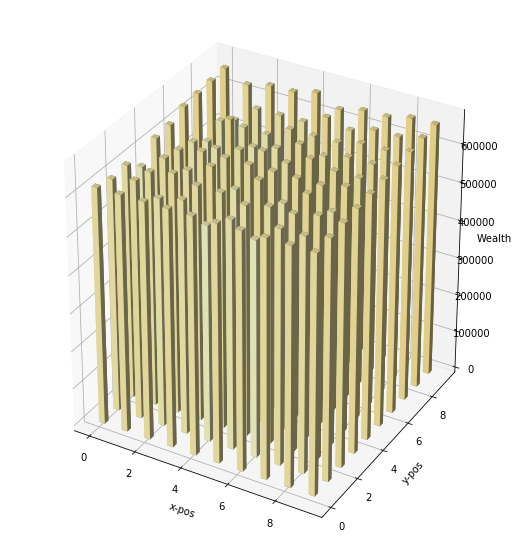

In [46]:
# Initialize Things

# boards
cap_board = make_cap()
cap_board = cap_board.copy()
wealth_board = start_wealth(cap_board)
wealth_board = wealth_board.copy()
# game counter
i = 0
# lists for tax graph
tax_list_cap_5 = []
tax_list_cap_5_actual = []
tax_list_pes_5 = []

# figure size
fig = plt.figure(figsize=(10, 10))

# capitalist board
plotgrid(cap_board)

# play the game i-1 times: set to 50
while i<50:
    # find optimal tax in turn i
    tax_cap_5, tax_pes_5 = opt_tax(wealth_board, cap_board, precision=1000)
    tax_list_cap_5_actual.append(tax_cap_5)
    if tax_cap_5 >= 0.05:
        tax_cap_5 = 0.05
    tax_list_cap_5.append(tax_cap_5)
    tax_list_pes_5.append(tax_pes_5)
    # workeres consume goods
    board = consume_goods(wealth_board, cap_board, buy=2500)
    # capitalists pay wages
    board1 = pay_wages(board, cap_board, wage=2000)
    # UBI given
    board2 = UBI(board1, cap_board, given=0)
    # tax all people the optimal tax
    board3 = perc_wealth_tax(board2, cap_board, tax_caps=tax_cap_5, tax_peas=tax_pes_5)
    # redistribute wealth
    board4 = redist_wealth(board3, cap_board, tax_caps=tax_cap_5, tax_peas=tax_pes_5)
    # advance the game
    i += 1

plot3d(board4)

plt.close()

As we see the game board still reaches the same equilibrium as before, but our optimal tax graph has a much better outcome. The 'capitalist tax: optimal' is showing us that the optimal tax on capitalists is falling over time which means the wealth inequality is going down as well but at a much steadier rate. This is one of the optimal strategies for bringing down wealth inequality without having any major shocks to the system.

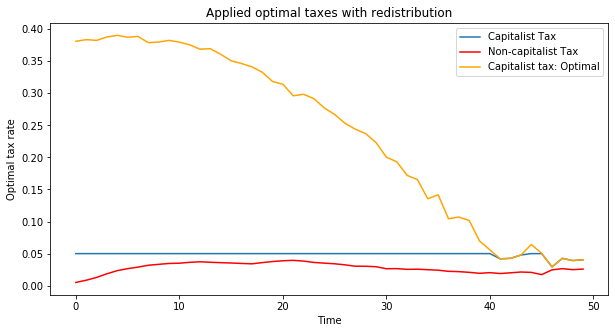

In [47]:
x = range(len(tax_list_cap_5))

plt.figure(figsize=(10,5))

plt.plot(x, tax_list_cap_5, label='Capitalist Tax')
plt.plot(x, tax_list_pes_5, color='red', label='Non-capitalist Tax')
plt.plot(x, tax_list_cap_5_actual, color='orange', label='Capitalist tax: Optimal')
plt.title('Applied optimal taxes with redistribution')
plt.xlabel('Time')
plt.ylabel('Optimal tax rate')
plt.legend(loc=1)

# Discussion and Conclusion

After working through my results and updating my model with different tax solutions I believe I've answered all my questions I had set out to. It appears that there is a single optimal tax that both capitalists and non-capitalists converge to over time and it sits around 5% so long as there is adequate redistribution of the taxes. My work didn't focus on finding an optimal redistribution technique, although I believe this could be found as well, but even a sub-perfect redistribution method shows promising results. Building my functions for this showed me the third question I asked was a bit silly, there isn't (at least from my work) a possibility of finding an absolutely convergent tax and redistribution system. There will always be some bouncing around of wealth, but with a good system of taxes and redistribution we can find a tight set of bounds for the optimal tax to cycle sit between.

I understand that the literal implementation of this system would be nearly impossible because of political disputes and the logistics surrounding the tax system of a large open economy, however, the results I've modeled are a great first step into discovering a better wealth redistribution system. I was able to show the minimal impacts a UBI would have on an economy, but also that it is markedly better than doing nothing for wealth inequality. Of course the end result was to show a theoretic tax rate that could help work against wealth inequality and this goal was largely met. There are still improvements to be made that could further optimize the model, but this is largely acceptable work.

The creation of the model of course came with its own set of problems. I had run into a lot of trouble creating the 3D graphing and so I wasn't able to look into other options that could have better shown the results of the model. It would have been nice to have just a little more time and guidance with how to interpret model results visually as I think it could have highlighted the results better. Another major issue was finding the best way to find an optimal tax. It was a struggle to build an effecient board search that could check over 100 values for an optimal tax and then return an averaged value over the board. That function along with the plotting made up around 80% of my coding time. I could have been proactive about finding a maths professor to help create that function and perhaps they could have also found a better method than the one I ended up using.